# This code is intended to be used for offline analysis of the magnetic data retreived from the WebDAQ and Minimus during site surveying.

## You may need to update the widget package to make this work.

## pip install ipywidgets --upgrade
## conda install conda-forge::ipywidgets

## Do not run all
## Run one cell at a time or plots may not populate

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout 
from scipy import signal
from matplotlib import gridspec
from scipy.fft import fftshift
import warnings


################################################################################################################################
################################################ To get your downloaded file ###################################################
######################## If you are using Windows, right click your file and select "Copy as Path" #############################
##################### If you are using Mac, right click and hold "Option." Then select "Copy as Path" ##########################
################################################################################################################################


##################################### This is an example of how the path should look ###########################################
######################################### # # # # # # # # # # # # # # # # # # # # ##############################################
################# seis = pd.read_csv(r"C:\Users\User\Downloads\data_file.csv", skiprows = 5, delimiter=',') ####################
######################################### # # # # # # # # # # # # # # # # # # # # ##############################################
####################### In file explorer, the file extension will not appear next to the file name #############################


############################# If you are using Mac, you may need to remove the r before the path ###############################
seis = pd.read_csv(r"C:\Users\cacam\Documents\data_files\truck\7-30\seismo_truck_c.csv", skiprows = 5, delimiter=',') 

seis.columns = ["Sample", "Time (s)", "Noise (V)", "Channel Z (V)", "Channel N (V)", "Channel E (V)", "blank"]

sam = seis['Sample']
tim = seis['Time (s)']
noi = seis['Noise (V)'] * 0.0125e-1
z = seis['Channel Z (V)'] * 0.0125e-1 ################ This the conversion factor for turning the data into m/s ################
n = seis['Channel N (V)'] * 0.0125e-1
e = seis['Channel E (V)'] * 0.0125e-1

###################################### This is the sample rate we used in testing ##############################################
fs = 1651.612903
####################################### If you used something else, put it here ################################################



################################ This will be for the data you collect with the Minimus ########################################
########################################## Make sure the times are the same ####################################################
'''

def extract_time(datetime_str):                   ############# This is for if you used the mseed2ascii C code #################
    # Extracts the time from the datetime string  ################### and output the data in a csv format ######################
    time_with_z = datetime_str.split('T')[1]      ############ This will remove the date from the "Time" column ################
    time_without_z = time_with_z.replace('Z', '') #################### This will remove the trailing 'Z' #######################
    return time_without_z


seisz = pd.read_csv(r"Put\data\path\here", skiprows = 8, delimiter=',')
seisn = pd.read_csv(r"Put\data\path\here", skiprows = 8, delimiter=',')
seise = pd.read_csv(r"Put\data\path\here", skiprows = 8, delimiter=',')

tim = seisz['Time'].apply(extract_time)
z = seisz[' Sample'] * 0.0015e-6
n = seisn[' Sample'] * 0.0015e-6 ################### This the conversion factor for turning the data into m/s ##################
e = seise[' Sample'] * 0.0015e-6

################################################ Do not change this value ######################################################
fs = 200 
################################################################################################################################
'''

## The following cell displays the time series of the recorded data

In [ ]:
plt.figure(figsize = (19, 11))

####################### You can change the linestyle/order in which they are ploted for ease of viewing ########################

plt.plot(tim,z, linewidth = 1.5, color = 'black', label = 'Z') 
plt.plot(tim,n, linewidth = 1.5, color = 'red', label = 'N')
plt.plot(tim,e, linewidth = 1.5, color = 'mediumblue', label = 'E')
#plt.plot(tim,noi, linewidth = 1.5, color = 'yellow', label = 'Noise')

plt.legend(loc = "upper right", fontsize = 18)
plt.title("Seismic Data Time Series", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [V]", fontweight = "bold", fontsize = 20)
plt.xlim(0, tim[len(tim)-1])
#plt.ylim()
plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")
plt.grid(True)

#.savefig('**place_img_name_here.format**', bbox_inches='tight')

## If you want to look at a specific time along the time series, you can use the slider plot below. 

### These variables are used to adjust the how many seconds are displayed and the step length

In [4]:
win = 15  ## sec displayed
stepy = 4  ## sec moved

## Beware, there may be a slight time delay when slidering

## If the slider is not workering move to the next cell

In [5]:
Min = min(z.min(), n.min(), e.min())  ########################## This is to find the window height #############################
Max = max(z.max(), n.max(), e.max())

##################################### This function is what makes the slider run ###############################################
######################################### Parameters can be changed as needed ##################################################

def plot_with_slider(xlim):
    
    plt.figure(figsize=(19, 8))   ## dpi breaks slider
    
    plt.plot(tim, z, linewidth = 1.5, label = 'Z', color = 'black')
    plt.plot(tim, n, linewidth = 1.5, label = 'N', color = 'red')
    plt.plot(tim, e, linewidth = 1.5, label = 'E', color = 'blue')
    
    plt.xlim(xlim, xlim + win) ####################### This is how long the window is (CAN be changed) #########################
    plt.ylim(Min - 1, Max + 1) ################## This adds a buffer to the window height (CAN be changed) #####################
    
    plt.legend(loc = 'upper right', fontsize = 15)
    plt.title("Slider Time Series", fontweight = 'bold', fontsize = 25)
    plt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)
    plt.ylabel("Amplitude [V]", fontweight = "bold", fontsize = 20)
    plt.yticks(fontsize = 20, fontweight = "bold")
    plt.xticks(fontsize = 20, fontweight = "bold")
    plt.grid(True)
    plt.show()

######################################## This is where the slider plot gets plotted ############################################
#### min,max = start,end ; step is the increment it slides on ; value is where it starts ; layout is how long the slider is ####
############################################### step and layout CAN be changed #################################################

interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (tim[len(tim)-1]), step = stepy, value = 0, 
                                              layout=Layout(width='980px')))


interactive(children=(FloatSlider(value=0.0, description='xlim', layout=Layout(width='980px'), max=312.440645,…

<function __main__.plot_with_slider(xlim)>

## If the slider is not working, you can use this cell to manually change the limits to look at a specific area of the time series.

In [ ]:
plt.figure(figsize = (19, 11))

####################### You can change the linestyle/order in which they are ploted for ease of viewing ########################

plt.plot(tim,z, linewidth = 1.5, color = 'black', label = 'Z') 
#plt.plot(tim,n, linewidth = 1.5, color = 'red', label = 'N')
#plt.plot(tim,e, linewidth = 1.5, color = 'mediumblue', label = 'E')
#plt.plot(tim,noi, linewidth = 1.5, color = 'yellow', label = 'Noise')

plt.legend(loc = "upper right", fontsize = 18)
plt.title("Seismic Data Time Series", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [V]", fontweight = "bold", fontsize = 20)
#plt.xlim()
#plt.ylim()
plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")
plt.grid(True)

#.savefig('**place_img_name_here.format**', bbox_inches='tight')

## The following cells are used to plot spectrograms for each direction

### These variables are to set limits for the plot and to compute the spectrogram

In [4]:
################################################## Colorbar Limits #############################################################
cmin = 10e-10
cmax = 5e-7

##################################################### Plot limits ##############################################################
ymax = 20 ## In terms of frequency
ymin = 0

###################################################### fft length ##############################################################
fft_len = 10 ## in terms of seconds

################################################# Precent FFT Overlap ##########################################################
olap = 50 ## 50% fft overlap

'\naxis4 = fig.add_subplot(gs[3,0])\n\naxis4.set_title("Noise Direction", fontweight = \'bold\' , fontsize = 20)\n\nm3 = axis1.pcolormesh(t, f, np.sqrt(Sxx), shading=\'gouraud\') ############### This will autoscale the plot ###################\n                                                                \nm3 = axis4.pcolormesh(t, f, np.sqrt(Sxx), shading=\'gouraud\', vmin = cmin, vmax = cmax)\n\naxis3.set_title("Electronic Noise", fontweight = \'bold\' , fontsize = 20)\naxis3.set_xlabel(\'Time [s]\', fontweight = \'bold\' , fontsize = 18)\naxis3.set_ylabel(\'Frequency [Hz]\', fontweight = \'bold\' , fontsize = 18)\naxis3.tick_params(labelsize=16)\n\ncbar3 = fig.colorbar(m3, pad = 0.02)\ncbar3.ax.tick_params(labelsize=14)\ncbar3.set_label(label=\'Intensity [m/s/Hz^0.5]\' ,weight=\'bold\', fontsize = 14)\n\n\naxis4.set_ylim(ymin, ymax) ## Uncomment to set limits\n\n#plt.savefig(\'**place_img_name_here.format**\', bbox_inches=\'tight\')\n'

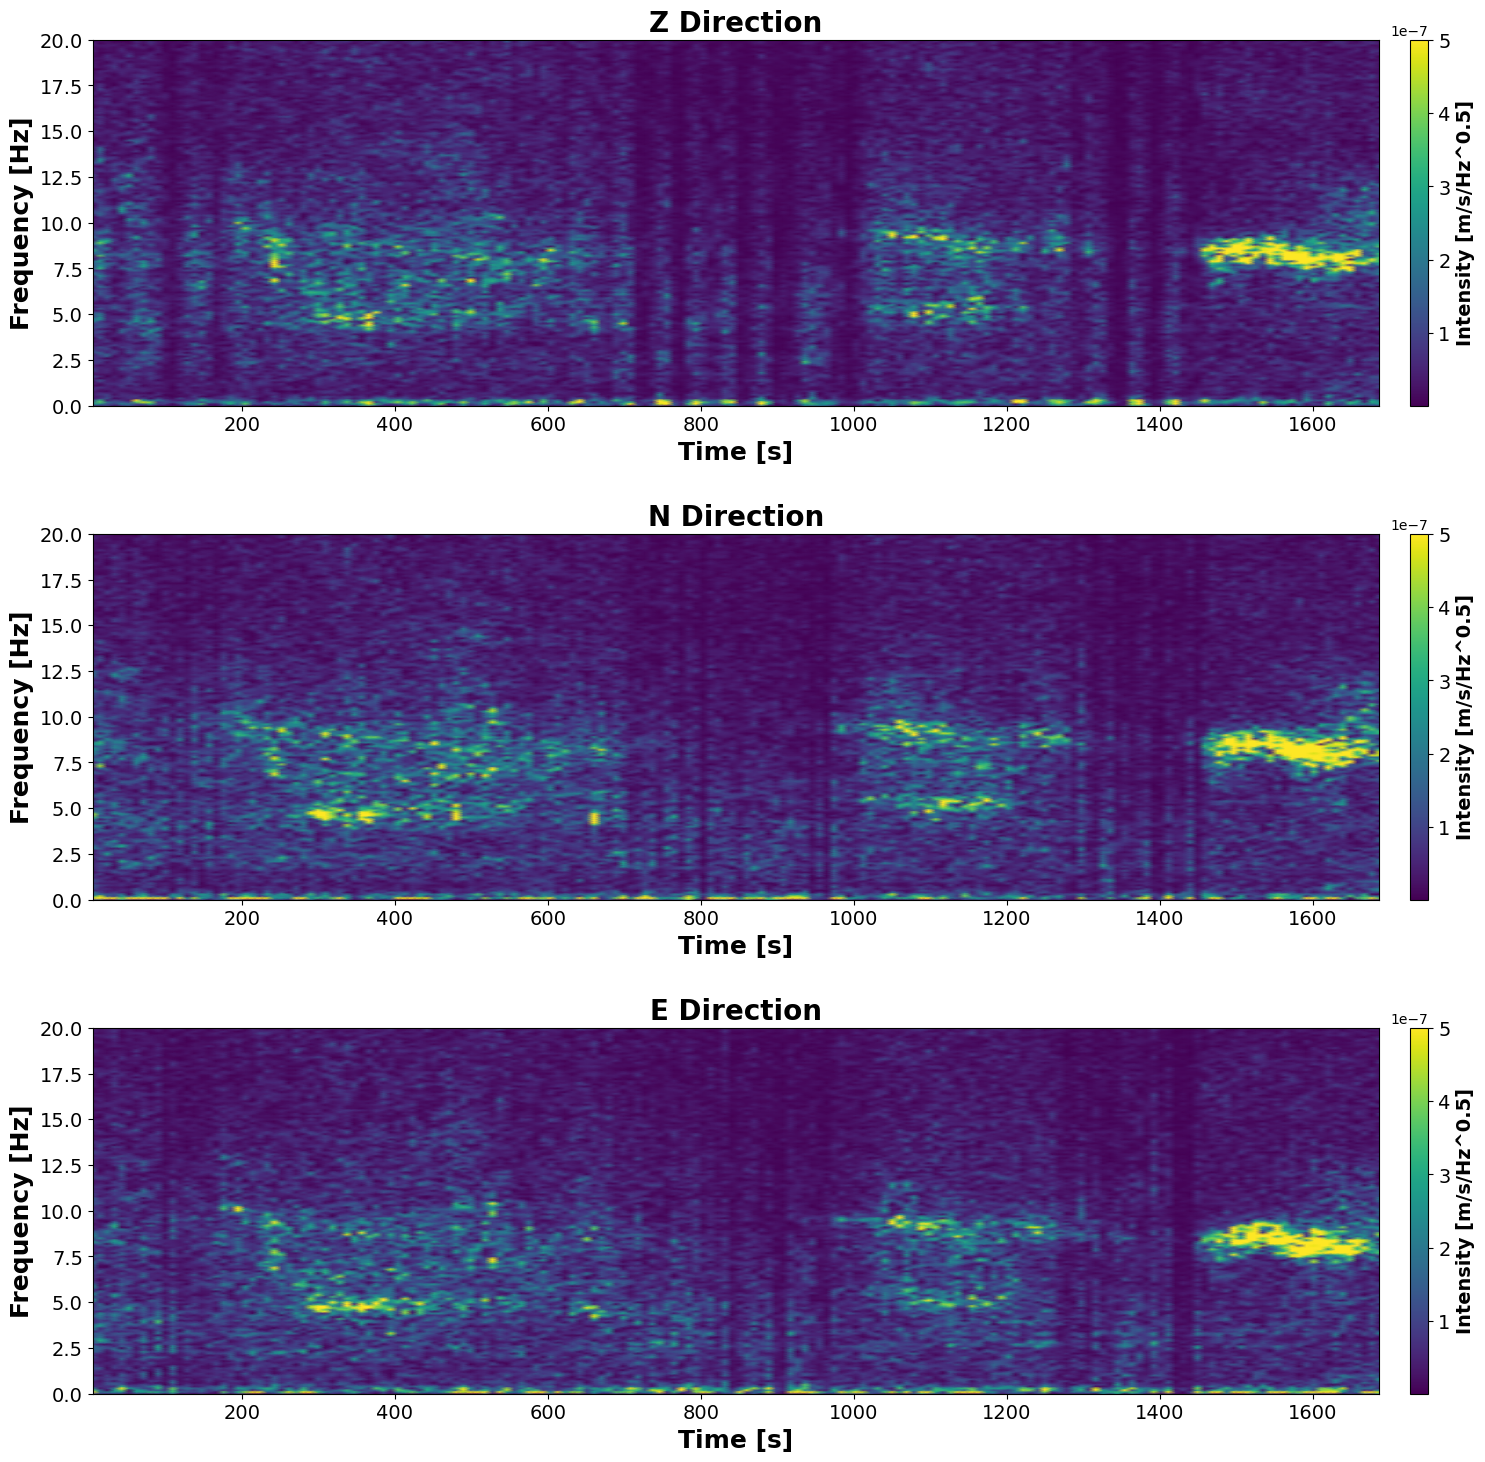

In [5]:
################################################################################################################################
###################### The spectrograms are calculated with signal.spectrogram from SciPy ######################################
################################################################################################################################
warnings.simplefilter('ignore')

fz, tz, Sxxz = signal.spectrogram(z, fs, window= 'hamming', nperseg=round(fs *fft_len), noverlap= round(fs *(olap *0.01)) )
fn, tn, Sxxn = signal.spectrogram(n, fs, window= 'hamming', nperseg=round(fs *fft_len), noverlap= round(fs *(olap *0.01)) )
fe, te, Sxxe = signal.spectrogram(e, fs, window= 'hamming', nperseg=round(fs *fft_len), noverlap= round(fs *(olap *0.01)) )
#f, t, Sxx = signal.spectrogram(noi, fs, window= 'hamming', nperseg=round(fs *fft_len), noverlap= round(fs *(olap *0.01)) )


fig = plt.figure(figsize = (20,24))

gs = gridspec.GridSpec(4,1, height_ratios = [1,1,1,1], hspace = 0.35)

####################################################### Channel Z ##############################################################

axis1 = fig.add_subplot(gs[0,0])

#m0 = axis1.pcolormesh(tz, fz, np.sqrt(Sxxz), shading='gouraud')############### This will autoscale the plot ###################
                                                                ## If you want to change the limits, uncomment the line below ##
                                                                ########### Be sure to comment out the line above ##############

m0 = axis1.pcolormesh(tz, fz, np.sqrt(Sxxz), shading='gouraud', vmin = cmin, vmax = cmax)

axis1.set_title("Z Direction", fontweight = 'bold' , fontsize = 20)
axis1.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis1.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis1.tick_params(labelsize=14)

cbar0 = fig.colorbar(m0, label='Intensity [m/s/Hz^0.5]', pad =0.02)
cbar0.ax.tick_params(labelsize=14)
cbar0.set_label(label='Intensity [m/s/Hz^0.5]' ,weight='bold', fontsize = 14)

axis1.set_ylim(ymin,ymax) ## Uncomment to set limits


####################################################### Channel N ##############################################################

axis2 = fig.add_subplot(gs[1,0])

#m1 = axis1.pcolormesh(tn, fn, np.sqrt(Sxxn), shading='gouraud')############### This will autoscale the plot ###################
                                                                
m1 = axis2.pcolormesh(tn, fn, np.sqrt(Sxxn), shading='gouraud', vmin = cmin, vmax = cmax)

axis2.set_title("N Direction", fontweight = 'bold' , fontsize = 20)
axis2.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis2.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis2.tick_params(labelsize=14)

cbar1 = fig.colorbar(m1, pad =0.02)
cbar1.ax.tick_params(labelsize=14)
cbar1.set_label(label='Intensity [m/s/Hz^0.5]' ,weight='bold', fontsize = 14)

axis2.set_ylim(ymin, ymax)  ## Uncomment to set limits

####################################################### Channel E ##############################################################

axis3 = fig.add_subplot(gs[2,0])

#m2 = axis1.pcolormesh(te, fe, np.sqrt(Sxxe), shading='gouraud')############### This will autoscale the plot ###################
                                                                
m2 = axis3.pcolormesh(te, fe, np.sqrt(Sxxe), shading='gouraud', vmin = cmin, vmax = cmax)

axis3.set_title("E Direction", fontweight = 'bold' , fontsize = 20)
axis3.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis3.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis3.tick_params(labelsize=14)

cbar2 = fig.colorbar(m2, pad =0.02)
cbar2.ax.tick_params(labelsize=14)
cbar2.set_label(label='Intensity [m/s/Hz^0.5]' ,weight='bold', fontsize = 14)

axis3.set_ylim(ymin, ymax) ## Uncomment to set limits


###################################################### Noise Channel ###########################################################
'''
axis4 = fig.add_subplot(gs[3,0])

axis4.set_title("Noise Direction", fontweight = 'bold' , fontsize = 20)

m3 = axis1.pcolormesh(t, f, np.sqrt(Sxx), shading='gouraud') ############### This will autoscale the plot ###################
                                                                
m3 = axis4.pcolormesh(t, f, np.sqrt(Sxx), shading='gouraud', vmin = cmin, vmax = cmax)

axis3.set_title("Electronic Noise", fontweight = 'bold' , fontsize = 20)
axis3.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis3.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis3.tick_params(labelsize=16)

cbar3 = fig.colorbar(m3, pad = 0.02)
cbar3.ax.tick_params(labelsize=14)
cbar3.set_label(label='Intensity [m/s/Hz^0.5]' ,weight='bold', fontsize = 14)


axis4.set_ylim(ymin, ymax) ## Uncomment to set limits

#plt.savefig('**place_img_name_here.format**', bbox_inches='tight')
'''
################################################################################################################################
################################## These will take a while to plot, since they are so dense ####################################

## If you want to look at spectra of specific parts of the time series, you can set the time limits here

## If not, skip the following two cells

In [16]:
################################### Enter how long of a time segment you'd like to look at #####################################
start = 0  ## In terms of seconds
end = 704

## These are loops to index the dataframes

In [ ]:
d = 0 ################################################# Variables for loops ####################################################
f = 0

################# If you want to look at the whole time series you can change the variables in the next cell ###################
################################################################################################################################

for d in range(0, len(tim)): ################ These are to find the index values of start,end from the data file ###############
    if round(tim[d]) == start:
        gamma = sam[d]
        break
        
for f in range(0, len(tim)):
    if round(tim[f]) == end:
        delta = sam[f]
        break

################################################### The data gets sliced #######################################################

z1 = z[gamma:delta]
n1 = n[gamma:delta]
e1 = e[gamma:delta]

## This cell is where the ASD is calculated and plotted

In [52]:
##################################################### Plot limits ##############################################################
x_max = 100 ## in terms of frequency
x_min = 5e-2

################################################## Velocity Y limits ###########################################################
y_max = 10e-6 ## in terms of m/s/Hz^0.5
y_min = 50e-10 

################################################ Displacement Y Limits #########################################################
my_max = 10e-7 ## in terms of m/Hz^0.5
my_min = 10e-12

##################################################### fft length ###############################################################
fft_length = 128 ## in terms of seconds

################################################# Precent FFT Overlap ##########################################################
overlap = 50 ## 50% fft overlap

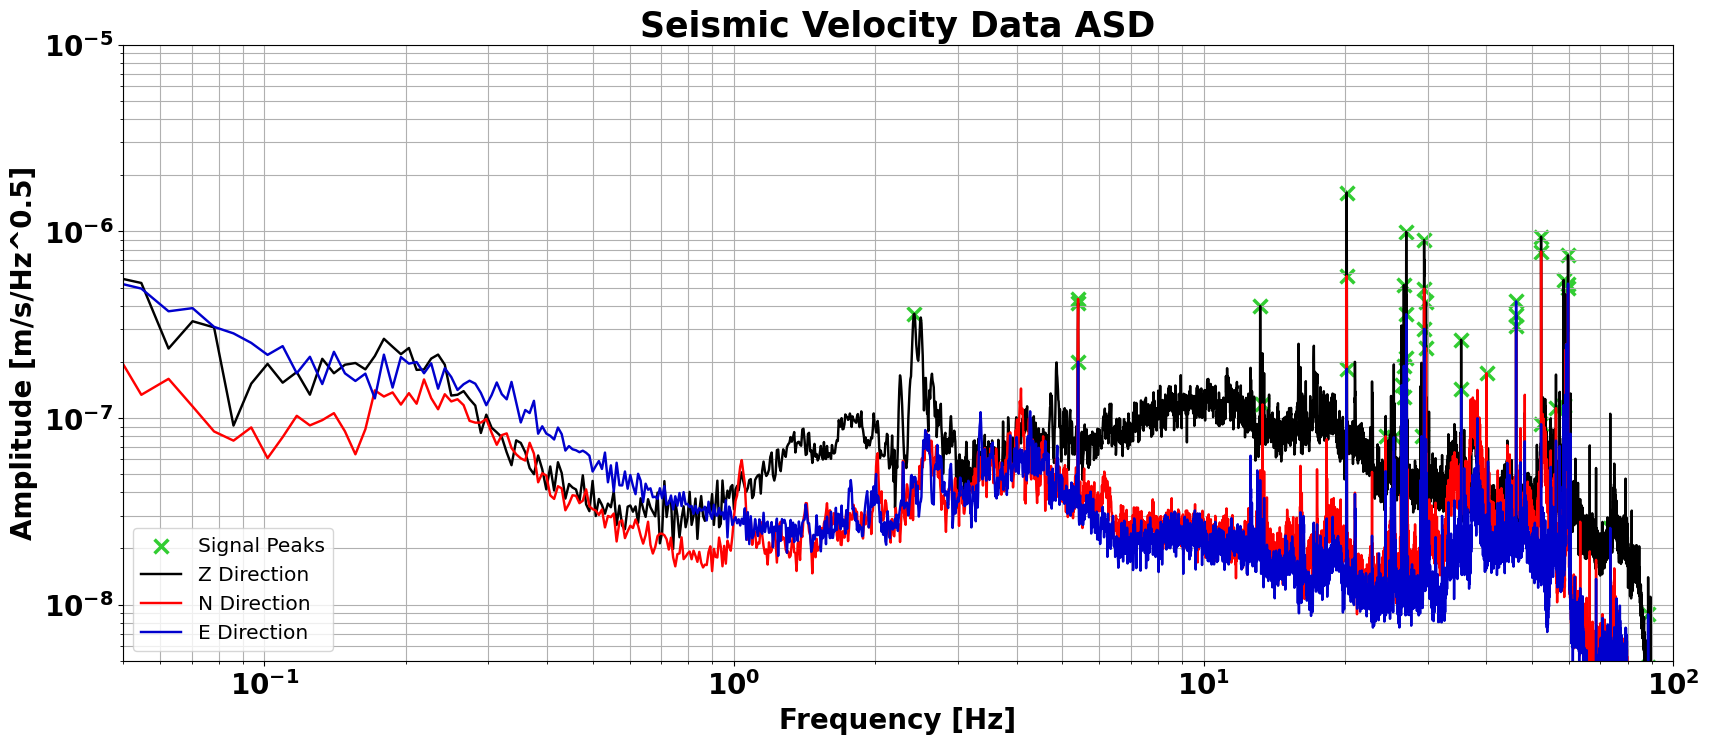

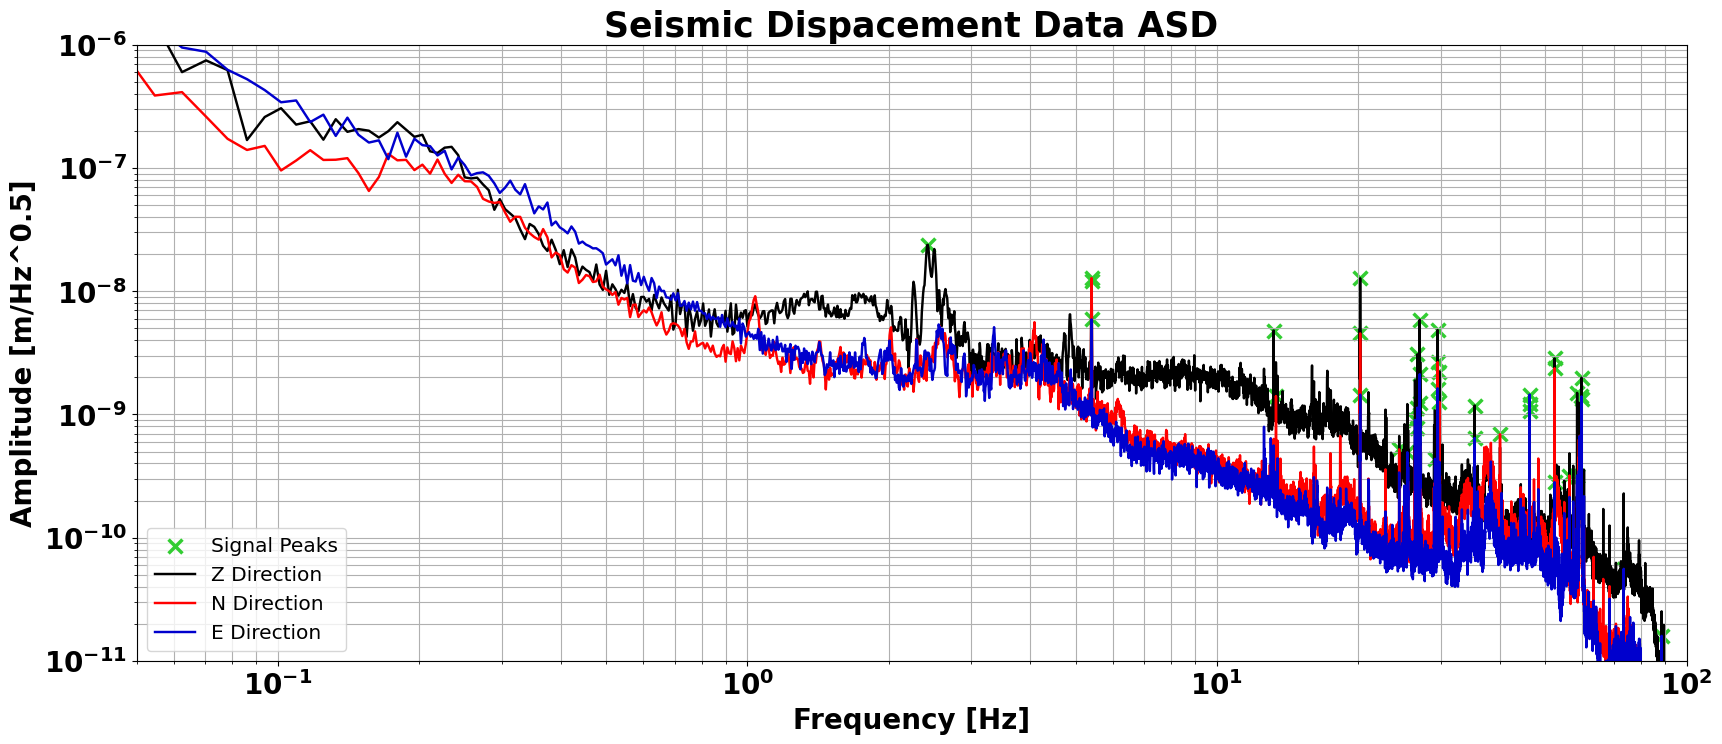

In [53]:
################################################################################################################################
######################################## The PSD is calculated via welch from scipy ############################################
################################################################################################################################
warnings.simplefilter('ignore')

############ If you don't want to look at the whole time series, you can add '1' to the variables, i.e k1, j1, i1 ##############

f_z, Pxx_den_z = signal.welch(z, fs, window= 'hamming', nperseg= (fs *fft_length), noverlap= round(fs *(overlap *0.01)) )
f_n, Pxx_den_n = signal.welch(n, fs, window= 'hamming', nperseg= (fs *fft_length), noverlap= round(fs *(overlap *0.01)) )
f_e, Pxx_den_e = signal.welch(e, fs, window= 'hamming', nperseg= (fs *fft_length), noverlap= round(fs *(overlap *0.01)) )

################### nfft is how long the fft bin lengths, noverlap is bin overlap, window is the window used ###################
####################### We used 100 sec bins, 0.5 sec overlap, and hamming window, these can be changed ########################
################################################ # DO NOT CHANGE/REMOVE 'fs' # #################################################


az = np.sqrt(Pxx_den_z)
an = np.sqrt(Pxx_den_n) ################################ This turns the PSD into an ASD ########################################
ae = np.sqrt(Pxx_den_e)

mz = az/ (2*np.pi *f_z)
mn = an/ (2*np.pi *f_n) ###################################### Converts m/s to m ###############################################
me = ae/ (2*np.pi *f_e)


log_z = np.log(az)
log_n = np.log(an) ############### The log of each ASD must be found in order to find the peaks/frequences #####################
log_e = np.log(ae)


peak_z, _ = signal.find_peaks(log_z, prominence = 2) ############### This is where the frequencies are found ###################
peak_n, _ = signal.find_peaks(log_n, prominence = 2) ################ If some are missed or there are extra ####################
peak_e, _ = signal.find_peaks(log_e, prominence = 2) ########### you will need to change the prominence variable ###############



################################################################################################################################
###################################################### PLots data ##############################################################
################################################################################################################################



################################################### Plots Velocity #############################################################
##################################################### Plots Peaks ##############################################################

plt.figure(1, figsize = (20, 8))#, dpi = 2500)

plt.scatter(f_z[peak_z], az[peak_z], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')
plt.scatter(f_n[peak_n], an[peak_n], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5)
plt.scatter(f_e[peak_e], ae[peak_e], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5)

#################################################### PLots Spectra #############################################################

plt.yscale('log')
plt.xscale('log')

plt.plot(f_z, az, color = 'black', linewidth = 1.75, label = 'Z Direction')
plt.plot(f_n, an, color = 'red', linewidth = 1.75, label = 'N Direction')
plt.plot(f_e, ae, color = 'mediumblue', linewidth = 1.75, label = 'E Direction')

plt.legend(loc = "lower left", fontsize = 14.5)

plt.title("Seismic Velocity Data ASD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [m/s/Hz^0.5]", fontweight = "bold", fontsize = 20)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")

plt.ylim(y_min,y_max)
plt.xlim(x_min,x_max)

plt.grid(True, which="both", ls="-")

#plt.savefig('**place_img_name_here.format**', bbox_inches='tight')



################################################# Plots Displacement ###########################################################
##################################################### Plots peaks ##############################################################

plt.figure(2, figsize = (20, 8))#, dpi = 2500)

plt.scatter(f_z[peak_z], mz[peak_z], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')
plt.scatter(f_n[peak_n], mn[peak_n], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5)
plt.scatter(f_e[peak_e], me[peak_e], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5)

#################################################### PLots Spectra #############################################################

plt.yscale('log')
plt.xscale('log')

plt.plot(f_z, mz, color = 'black', linewidth = 1.75, label = 'Z Direction')
plt.plot(f_n, mn, color = 'red', linewidth = 1.75, label = 'N Direction')
plt.plot(f_e, me, color = 'mediumblue', linewidth = 1.75, label = 'E Direction')

plt.legend(loc = "lower left", fontsize = 14.5)

plt.title("Seismic Dispacement Data ASD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [m/Hz^0.5]", fontweight = "bold", fontsize = 20)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")

plt.ylim(my_min,my_max)
plt.xlim(x_min,x_max)

plt.grid(True, which="both", ls="-")

#plt.savefig('**place_img_name_here.format**', bbox_inches='tight')

## The following cell will plot each of direction signal in their own respective plots
### If you don't want/need to look at them individually, you don't have to run it

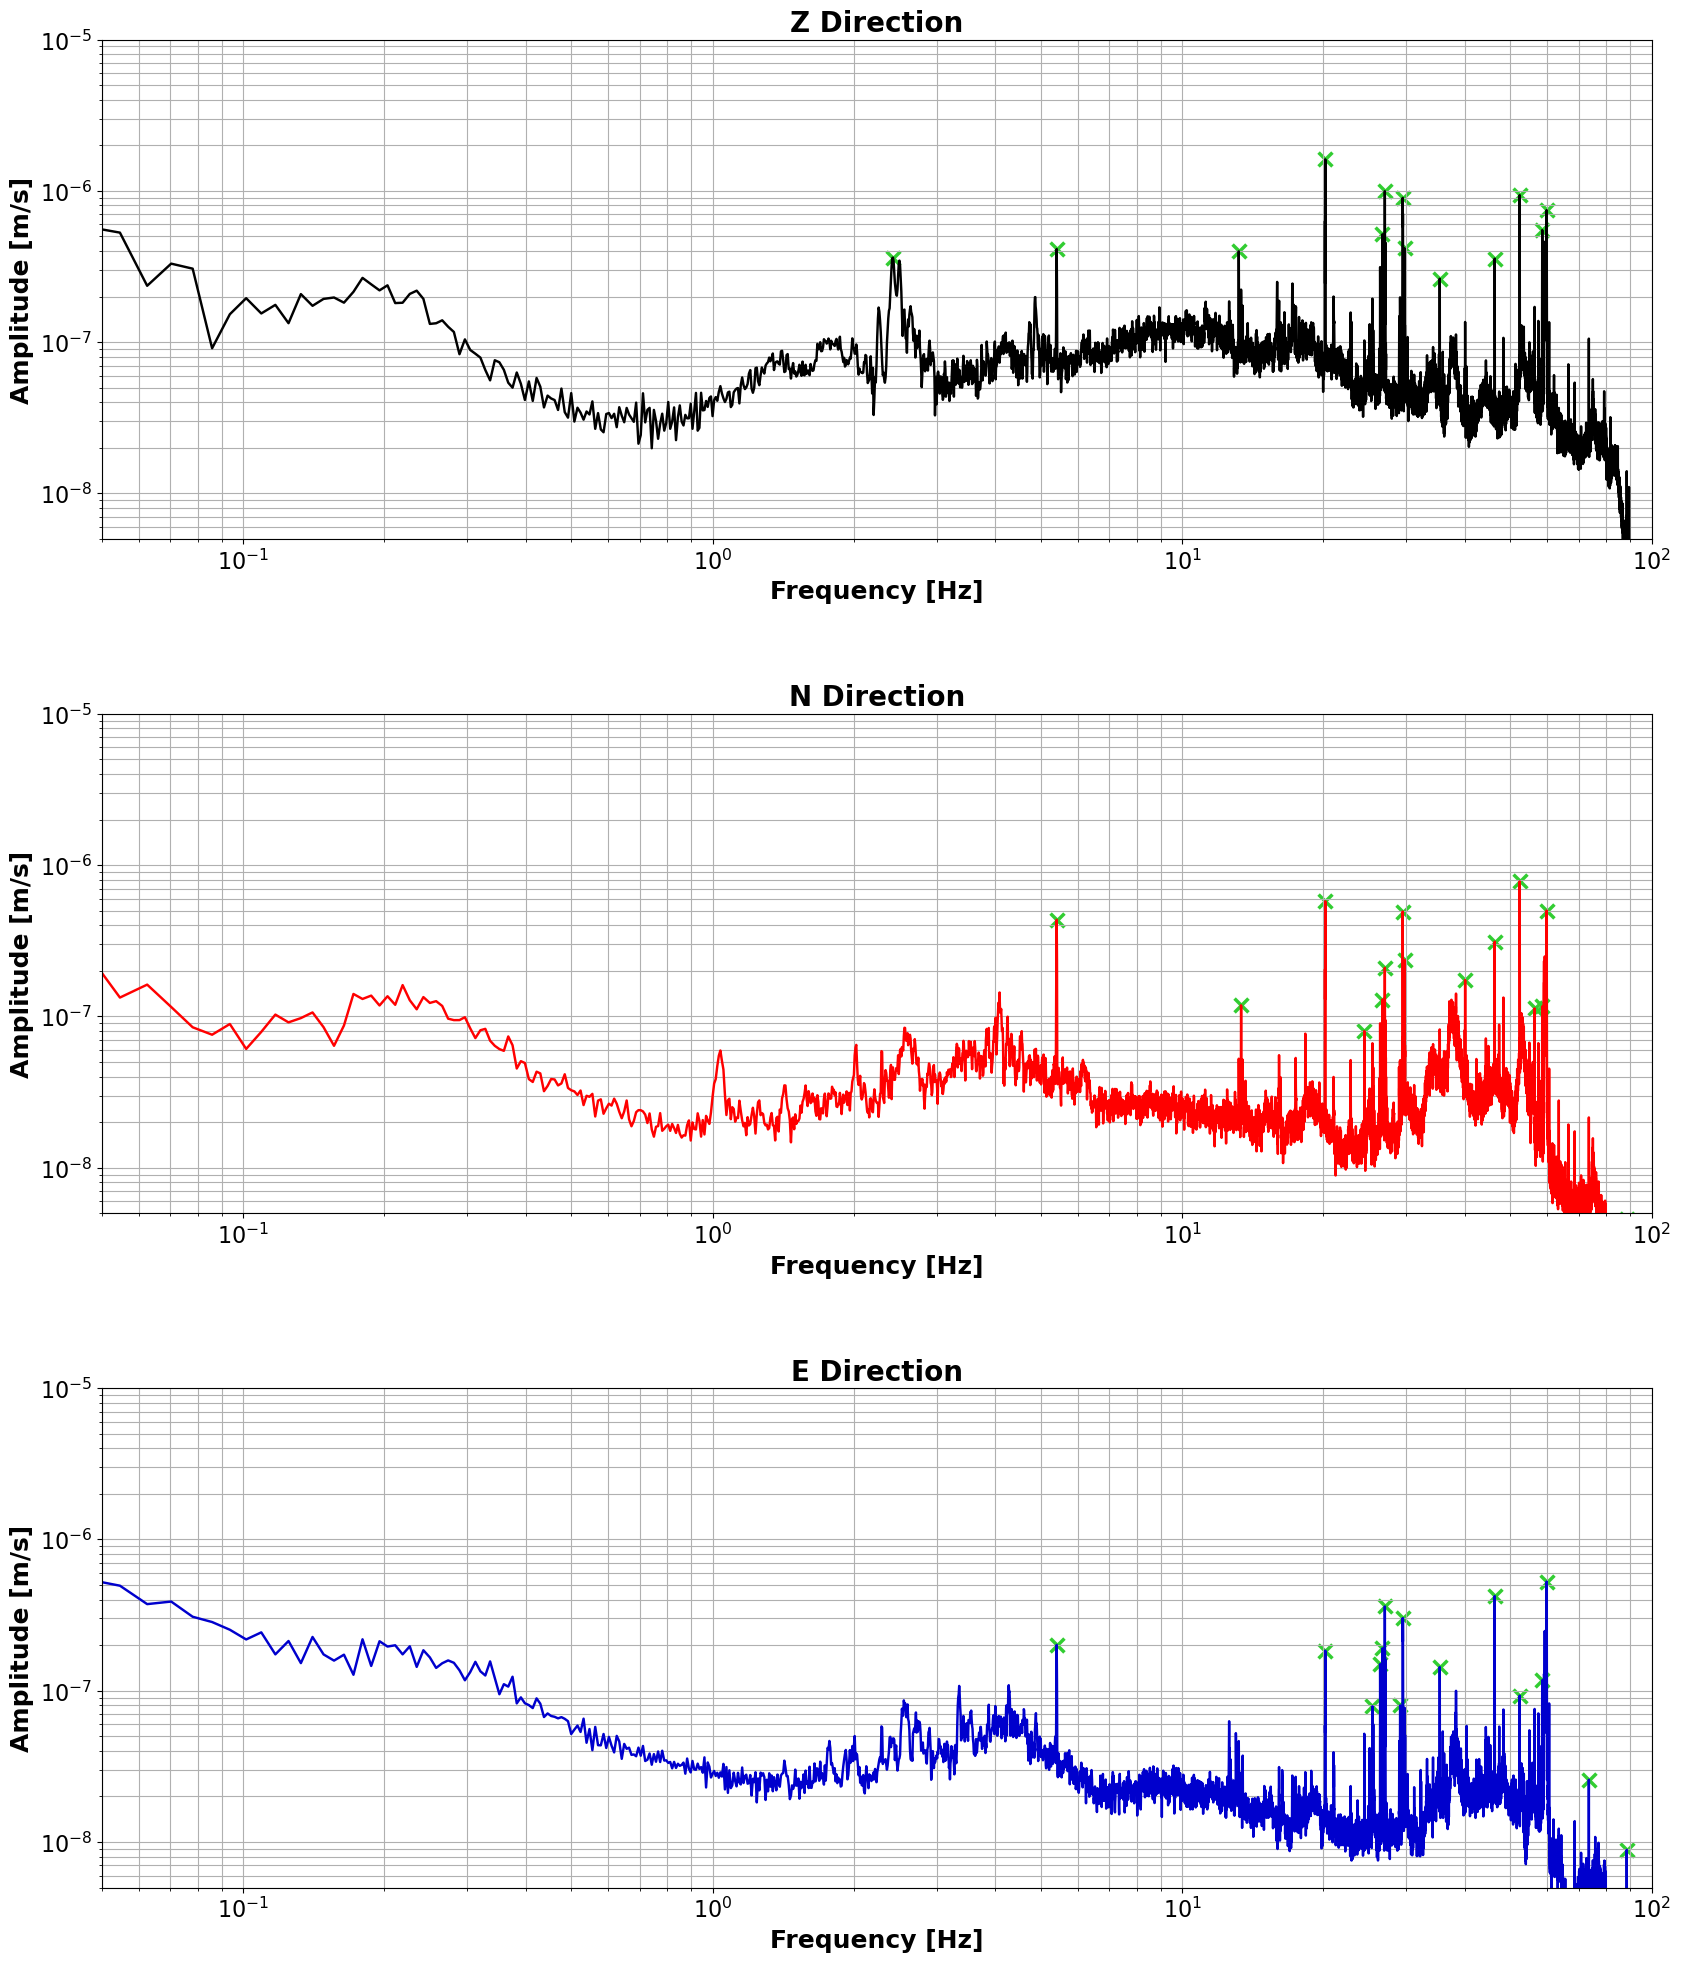

In [69]:
################################################################################################################################
############################# This gets plotted as a multipanel plot via gridspec and subplot ##################################
################################################################################################################################

fig = plt.figure(figsize = (20,24))

gs = gridspec.GridSpec(3,1, height_ratios = [1,1,1], hspace = 0.35)

####################################################### Channel Z ##############################################################

axis1 = fig.add_subplot(gs[0,0])

axis1.set_title("Z Direction", fontweight = 'bold' , fontsize = 20)

axis1.set_yscale('log')
axis1.set_xscale('log')

axis1.scatter(f_z[peak_z], az[peak_z], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')
axis1.plot(f_z, az, color = 'black', linewidth = 1.75, label = 'Z Direction')

axis1.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 18)
axis1.set_ylabel("Amplitude [m/s]", fontweight = "bold", fontsize = 18)

axis1.tick_params(labelsize=16)

plt.ylim(y_min,y_max)
plt.xlim(x_min,x_max)

axis1.grid(True, which="both", ls="-")

####################################################### Channel N ##############################################################

axis2 = fig.add_subplot(gs[1,0])

axis2.set_title("N Direction", fontweight = "bold", fontsize = 20)

axis2.set_yscale('log')
axis2.set_xscale('log')

axis2.scatter(f_n[peak_n], an[peak_n], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5)
axis2.plot(f_n, an, color = 'red', linewidth = 1.75, label = 'N Direction')

axis2.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 18)
axis2.set_ylabel("Amplitude [m/s]", fontweight = "bold", fontsize = 18)

axis2.tick_params(labelsize=16)

plt.ylim(y_min,y_max)
plt.xlim(x_min,x_max)

axis2.grid(True, which="both", ls="-")

####################################################### Channel E ##############################################################

axis3 = fig.add_subplot(gs[2,0])

axis3.set_title("E Direction", fontweight = "bold", fontsize = 20)

axis3.set_yscale('log')
axis3.set_xscale('log')

axis3.scatter(f_e[peak_e], ae[peak_e], s = 100, color = 'limegreen', marker = 'x', 
            linewidths = 2.5)
axis3.plot(f_e, ae, color = 'mediumblue', linewidth = 1.75, label = 'E Direction')

axis3.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 18)
axis3.set_ylabel("Amplitude [m/s]", fontweight = "bold", fontsize = 18)

axis3.tick_params(labelsize=16)

plt.ylim(y_min,y_max)
plt.xlim(x_min,x_max)

axis3.grid(True, which="both", ls="-")

#plt.savefig('**place_img_name_here.format**', bbox_inches='tight')

## This cell will output all the frequencies found and their respective amplitudes into a csv file

In [68]:
####################################################### # # # # # # ############################################################
################################################### # SPAGHETTI CODE # #########################################################
###################################################### # # # # # # # ###########################################################
################################################################################################################################
###################################### Since each direction has a different number of peaks ####################################
############################################### They cannot be printed out right ###############################################
########################################### So they have to be made the same length ############################################
################################################################################################################################

l = 0 ################################################## Variables for loops ###################################################
m = 0
o = 0
q = 0

index = [] ############################################ Empty sets to be appended to ###########################################
roll = []
inventory = []

tsukishima = max(len(f_e[peak_e]), len(f_n[peak_n]), len(f_z[peak_z])) # Finds the directions with the most peaks, i.e longest #

for q in range(0, tsukishima - len(f_e[peak_e])): ############# The shorter data sets will be made equal with 'Nan' ############
    inventory.append(np.nan)                      ################## Nothing will happen to the longest set ####################
for m in range(0, tsukishima - len(f_n[peak_n])): ################ If they are the same length nothing happens #################
    index.append(np.nan)
for o in range(0, tsukishima - len(f_z[peak_z])):
    roll.append(np.nan)

################################################################################################################################
######################################### This path is where the file gets outputted ###########################################
####################################################### Change as need #########################################################

with open (r"outfile.csv",'w') as f: 
        f.write('Frequency_E (HZ), Amplitude_E (m/s/HZ^0.5), Frequency_N (Hz), Amplitude_N (m/s/HZ^0.5), Frequency_Z (Hz), Amplitude_Z (m/s/HZ^0.5)\n')
        
        for l in range(0, tsukishima):
            if (len(f_e[peak_e]) != len(f_n[peak_n]) or len(f_e[peak_e]) != len(f_z[peak_z]) or len(f_n[peak_n]) != len(f_z[peak_z])):                
                if len(f_e[peak_e]) == tsukishima:      
                    
############################################# The files are made the same length ###############################################

                    dir3 = np.append(f_n[peak_n], index)
                    dir_3 = np.append(an[peak_n], index)
                    dir4 = np.append(f_z[peak_z], roll)
                    dir_4 = np.append(az[peak_z], roll)

##################################### This where the dat points get printed in the file ########################################

                    f.write(str(f_e[peak_e][l]) + ',' + str(ae[peak_e][l]) + ',' +    
                            str(dir3[l]) + ',' + str(dir_3[l]) + ',' +
                            str(dir4[l]) + ',' + str(dir_4[l]) + '\n')
                    
###################### The elif's are for if a different direction has more peaks, longest data set ############################

                elif len(f_n[peak_n]) == tsukishima:
                    
                    dir3 = np.append(f_e[peak_e], inventory)
                    dir_3 = np.append(ae[peak_e], inventory)
                    dir4 = np.append(f_z[peak_z], roll)
                    dir_4 = np.append(az[peak_z], roll)
                    
                    f.write(str(dir3[l]) + ',' + str(dir_3[l]) + ',' +    
                            str(f_n[peak_n][l]) + ',' + str(an[peak_n][l]) + ',' +
                            str(dir4[l]) + ',' + str(dir_4[l]) + '\n')

                    
                elif len(f_z[peak_z]) == tsukishima:
                    
                    dir3 = np.append(f_e[peak_e], inventory)
                    dir_3 = np.append(ae[peak_e], inventory)
                    dir4 = np.append(f_n[peak_n], index)
                    dir_4 = np.append(an[peak_n], index)
                    
                    f.write(str(dir3[l]) + ',' + str(dir_3[l]) + ',' +    
                            str(dir4[l]) + ',' + str(dir_4[l]) + ',' +
                            str(f_z[peak_z][l]) + ',' + str(az[peak_z][l]) + '\n')

############################### If the data sets are the same length the data will be printed here #############################

            else:
                f.write(str(f_e[peak_e][l]) + ',' + str(ae[peak_e][l]) + ',' +    
                        str(f_n[peak_n][l]) + ',' + str(an[peak_n][l]) + ',' +
                        str(f_z[peak_z][l]) + ',' + str(az[peak_z][l]) + '\n')
print('It ran')

It ran
